In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
HOME = "/lnet/troja/projects/neuralpiece/intrinsic-segmentation-eval/"

In [4]:
def load_csv_result(path, skip_header=True):
    vocab = []
    mean = []
    low = []
    high = []
    with open(path) as f_csv:
        if skip_header:
            f_csv.readline()
        for line in f_csv:
            vocab_str, mean_str, low_str, high_str = line.strip().split(",")
            vocab.append(int(vocab_str))
            mean.append(float(mean_str))
            low.append(float(low_str))
            high.append(float(high_str))
    return vocab, mean, low, high

In [5]:
def load_experiments_results(lng, init_type, eval_file):
    vocab = []
    mean = []
    low = []
    high = []
    for size in [1, 2, 4, 8, 16, 24, 32, 40, 48, 56, 64, 96, 72, 80, 128, 160, 192]:
        path = f"{HOME}/{lng}/experiments/from_{init_type}{size}k/{eval_file}"
        if not os.path.exists(path):
            continue
        with open(path) as f:
            data = f.readline().strip().split(",")
        if len(data) != 4:
            continue
        voc_str, mean_str, low_str, high_str = data
        vocab.append(int(voc_str))
        mean.append(float(mean_str))
        low.append(float(low_str))
        high.append(float(high_str))
    return vocab, mean, low, high

In [110]:
def plot_line_with_confidence(vocab, mean, low, high, title, ax, color, style):
    first_line = ax.plot(vocab, mean, label=title, marker=".", markersize=4, color=color, linestyle=style)[0]
    #ax.plot(vocab, low, linewidth=0, markersize=3, marker="_", color=first_line._color)
    #ax.plot(vocab, high, linewidth=0, markersize=3, marker="_", color=first_line._color)
    #ax.fill_between(vocab, low, high, alpha=0.2, color=first_line._color)
    
def plot_point_confidence(vocab, mean, low, high, title, ax, vocab_left):
    if not vocab:
        return
    if vocab[0] <= 56000:
        point = ax.plot(vocab, mean, label=title, marker=".", markersize=7, linewidth=0)[0]
        ax.plot(vocab, low, marker="_", markersize=10, linewidth=0, color=point._color)
        ax.plot(vocab, high, marker="_", markersize=10, linewidth=0, color=point._color)
        if vocab_left:
            ax.annotate(str(int(vocab[0]/1000))+"k", (vocab[0] - 1000, mean[0] - 1.5), horizontalalignment='right', verticalalignment='center')
        else:
            ax.annotate(str(int(vocab[0]/1000))+"k", (vocab[0], mean[0] + 1.5), horizontalalignment='center')
    else:
        point = ax.plot([53500], mean, label=title, marker=9, markersize=8, linewidth=0)[0]
        #ax.plot([184000], mean, marker=9, markersize=8, linewidth=0, color=point._color)
        ax.plot([55000], mean, marker=9, markersize=8, linewidth=0, color=point._color)
        ax.plot([56500], mean, marker=9, markersize=8, linewidth=0, color=point._color)
        if vocab_left:
            ax.annotate(str(int(vocab[0]/1000))+"k", (52500, mean[0]), horizontalalignment='right', verticalalignment='center')
        else:
            ax.annotate(str(int(vocab[0]/1000))+"k", (52000, mean[0] + 1.5))

In [166]:
LNG_NAMES = {
    "cs": "Czech",
    "de": "German",
    "en": "English",
    "es": "Spanish",
    "fi": "Finish",
    "fr": "French",
    "hu": "Hungarian",
    "it": "Italian",
    "mn": "Mongolian",
    "ru": "Russian"
}

#https://stackoverflow.com/questions/29461608/fixing-x-axis-scale-and-autoscale-y-axis
def autoscale_y(ax,margin=0.1):
    """This function rescales the y-axis based on the data that is visible given the current xlim of the axis.
    ax -- a matplotlib axes object
    margin -- the fraction of the total height of the y-data to pad the upper and lower ylims"""

    import numpy as np

    def get_bottom_top(line):
        xd = line.get_xdata()
        yd = line.get_ydata()
        lo,hi = ax.get_xlim()
        y_displayed = yd[((xd>lo) & (xd<hi))]
        h = np.max(y_displayed) - np.min(y_displayed)
        bot = np.min(y_displayed)-margin*h
        top = np.max(y_displayed)+margin*h
        return bot,top

    lines = ax.get_lines()
    bot,top = np.inf, -np.inf

    for line in lines:
        new_bot, new_top = get_bottom_top(line)
        if new_bot < bot: bot = new_bot
        if new_top > top: top = new_top

    ax.set_ylim(bot,top)

colors = matplotlib.colormaps['tab20c'].colors

def plot_lng(lng, ax, test_set, show_y_label=False, show_x_label=True, suffix="score", vocab_left=False, show_lng=True):

    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.bpe.{suffix}"), title="BPE", ax=ax, color=colors[0], style="solid")
    plot_line_with_confidence(*load_experiments_results(lng, "bpe", f"{test_set}.embedding-based.{suffix}"), title="Emb. BPE", ax=ax, color=colors[1], style="dashed")
    plot_line_with_confidence(*load_experiments_results(lng, "bpe", f"bigrams.{suffix}"), title="Bigram BPE", ax=ax, color=colors[2], style="dotted")
    
    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.spm.{suffix}"), title="SP", ax=ax, color=colors[4], style="solid")
    plot_line_with_confidence(*load_experiments_results(lng, "sp", f"{test_set}.embedding-based.{suffix}"), title="Emb. SP", ax=ax, color=colors[5], style="dashed")
    plot_line_with_confidence(*load_experiments_results(lng, "sp", f"bigrams.{suffix}"), title="Bigram SP", ax=ax, color=colors[6], style="dotted")    

    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morf-bpe.{suffix}"), title="M+BPE", ax=ax, color=colors[8], style="solid")
    plot_line_with_confidence(*load_experiments_results(lng, "morf-bpe", f"{test_set}.embedding-based.{suffix}"), title="Emb. M+BPE", ax=ax, color=colors[9], style="dashed")
    plot_line_with_confidence(*load_experiments_results(lng, "morf-bpe", f"bigrams.{suffix}"), title="EmbBigr M+BPE", ax=ax, color=colors[10], style="dotted")

    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morf-spm.{suffix}"), title="M+SP", ax=ax, color=colors[12], style="solid")
    plot_line_with_confidence(*load_experiments_results(lng, "morf-sp", f"{test_set}.embedding-based.{suffix}"), title="Emb. M+SP", ax=ax, color=colors[13], style="dashed")
    plot_line_with_confidence(*load_experiments_results(lng, "morf-sp", f"bigrams.{suffix}"), title="EmbBigr M+SP", ax=ax, color=colors[14], style="dotted")

    
    if show_x_label:
        ax.set_xlabel("Subword vocabulary size", fontsize=13)
        #ax.set_xlim(0, 192000)
    ax.set_xlim(5000, 35000)
    ax.set_xscale("linear")
    ax.set_xticks([5000, 15000, 25000, 35000], ["5k", "15k", "25k", "35k"])
    autoscale_y(ax, 0.2)

    if show_lng:
        yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
        ax.annotate(LNG_NAMES[lng], (33000, ax.get_ylim()[0] + 0.05 * yrange), fontsize=20, horizontalalignment="right")
    
        
    #ax.set_xlim(0, 150000)
    #ax.set_xticks([0, 50000, 100000, 150000])    
    #ax.set_xticklabels(["0", "50k", "100k", "150k"])    
    
    if show_y_label:
        if suffix == "score":
            ax.set_ylabel("Boundary position precision", fontsize=13)
        elif suffix == "recall":
            ax.set_ylabel("Boundary position recall", fontsize=13)
        else:
            ax.set_ylabel("Boundary position F-score", fontsize=13)
        

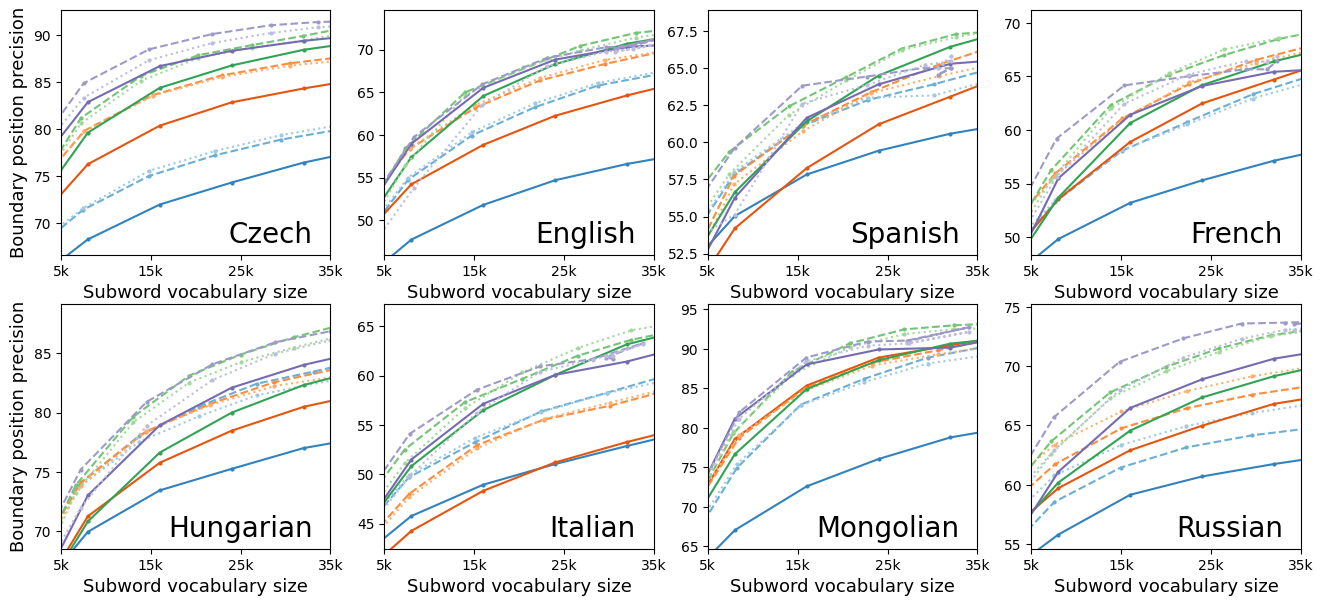

In [162]:
def plot_sigmorphon(test_set, suffix="score"):
    fig, axs = plt.subplots(2, 4, figsize=(16, 7))#, gridspec_kw = {'wspace':0, 'hspace': 0.1})
    #plt.axis('on')

    if suffix == "score":
        plot_lng("cs", axs[0, 0], test_set, show_y_label=True, suffix=suffix, vocab_left=True)
    else:
        plot_lng("cs", axs[0, 0], test_set, show_y_label=True, suffix=suffix, vocab_left=False)
    plot_lng("en", axs[0, 1], test_set, suffix=suffix)
    plot_lng("es", axs[0, 2], test_set, suffix=suffix)
    plot_lng("fr", axs[0, 3], test_set, suffix=suffix)
    
    plot_lng("hu", axs[1, 0], test_set, show_y_label=True, suffix=suffix, vocab_left=True)
    plot_lng("it", axs[1, 1], test_set, suffix=suffix)
    plot_lng("mn", axs[1, 2], test_set, suffix=suffix)
    plot_lng("ru", axs[1, 3], test_set, suffix=suffix)

    #lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    #lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    #lines, labels = axs[0, 3].get_legend_handles_labels()
    #fig.legend(lines, labels, loc="lower center", ncols=12, frameon=False, fontsize=8)
    return fig
plot_sigmorphon("sigmorphon").savefig("precision.pdf", bbox_inches='tight')

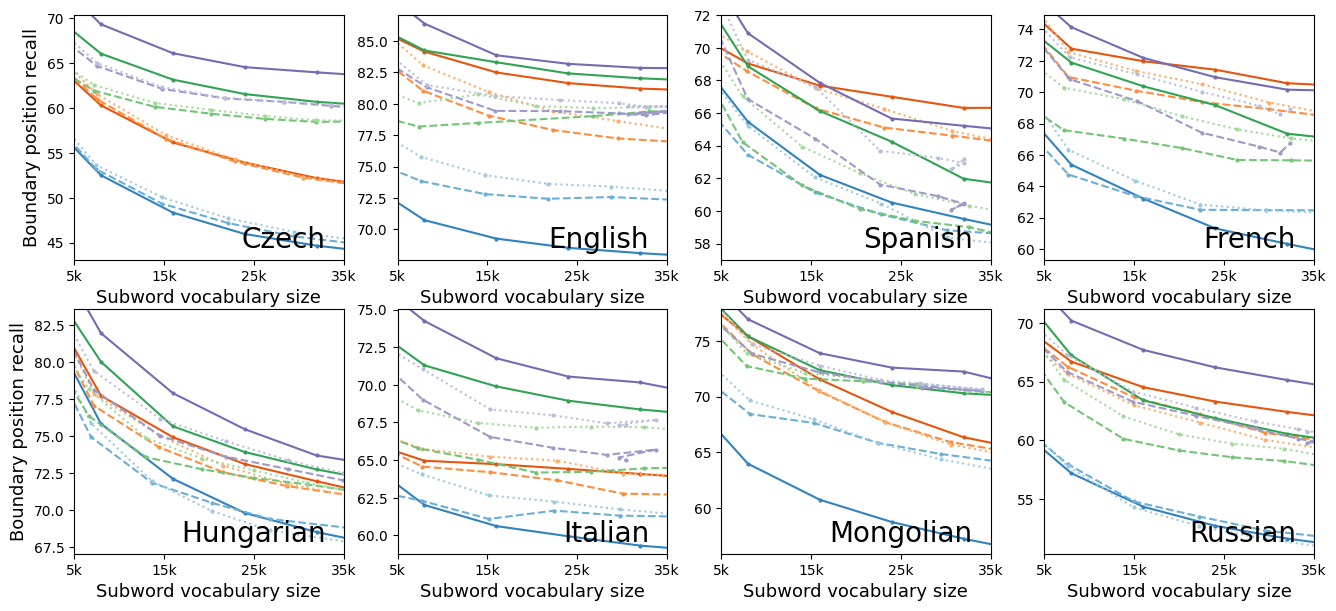

In [163]:
plot_sigmorphon("sigmorphon", suffix="recall").savefig("recall.pdf", bbox_inches='tight')

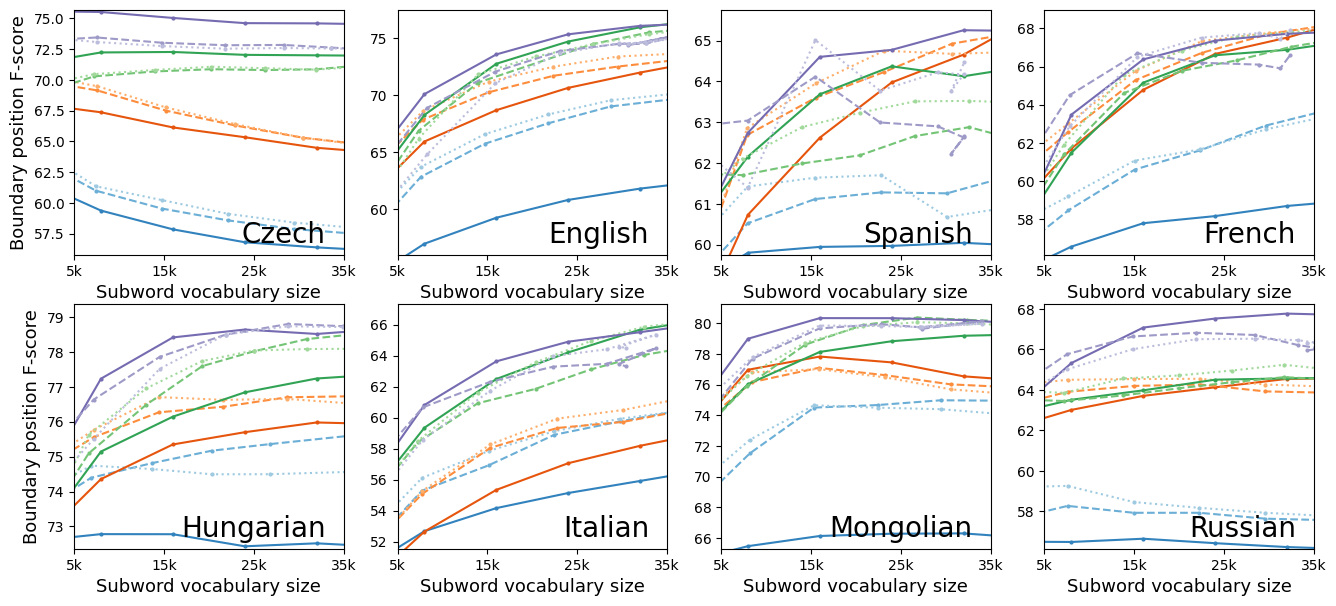

In [164]:
plot_sigmorphon("sigmorphon", suffix="fscore").savefig("fscore.pdf", bbox_inches='tight')

In [137]:
!pdftk precision.pdf recall.pdf fscore.pdf cat output scores.pdf

In [14]:
def print_line(pretok: str, vocab_learn: str, inference: str, distill: str, data):
    #print(f"{pretok},{vocab_learn},{inference},{distill}," +
    #      ",".join(str(x) for x in data[1][3:11]))
    print(",".join(str(x) for x in data[1][3:9]))


def csv_lng(lng, test_set="sigmorphon", suffix="score"):
    if not os.path.exists(f"{HOME}/{lng}/baselines/{test_set}.bpe.{suffix}"):
        return

    print_line("words", "BPE", "BPE", "No", load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.bpe.{suffix}"))
    print_line("words", "BPE", "Emb.", "No", load_experiments_results(lng, "bpe", f"{test_set}.embedding-based.{suffix}"))
    print_line("words", "BPE", "Emb.", "Yes", load_experiments_results(lng, "bpe", f"bigrams.{suffix}"))
    
    print_line("words", "SP", "SP", "No", load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.spm.{suffix}"))
    print_line("words", "SP", "Emb.", "No", load_experiments_results(lng, "sp", f"{test_set}.embedding-based.{suffix}"))
    print_line("words", "SP", "Emb.", "Yes", load_experiments_results(lng, "sp", f"bigrams.{suffix}"))
    
    print_line("morf", "BPE", "BPE", "No", load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morf-bpe.{suffix}"))
    print_line("morf", "BPE", "Emb", "No", load_experiments_results(lng, "morf-bpe", f"{test_set}.embedding-based.{suffix}"))
    print_line("morf", "BPE", "Emb", "Yes", load_experiments_results(lng, "morf-bpe", f"bigrams.{suffix}"))
    #print_line("morf", "BPE", "BPE", "Yes", load_experiments_results(lng, "morf-bpe", f"init_bigrams.{suffix}"))

    print_line("morf", "SP", "SP", "No", load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morf-spm.{suffix}"))
    print_line("morf", "SP", "Emb", "No", load_experiments_results(lng, "morf-sp", f"{test_set}.embedding-based.{suffix}"))
    print_line("morf", "SP", "Emb", "Yes", load_experiments_results(lng, "morf-sp", f"bigrams.{suffix}"))
    #print_line("morf", "SP", "SP", "Yes", load_experiments_results(lng, "morf-sp", f"init_bigrams.{suffix}"))

LNG_AND_CODE = [
    ("Czech", "cs"), ("English", "en"), ("Spanish", "es"), ("French", "fr"),
    ("Hungarian", "hu"), ("Italian", "it"), ("Mongolian", "mn"), ("Russian", "ru")]

for lng, code in LNG_AND_CODE:
    print(lng)
    #csv_lng(code, suffix="score")
    #csv_lng(code, suffix="recall")
    csv_lng(code, suffix="fscore")
    print()

Czech
59.37599198801514,57.8527402976146,56.805712870299566,56.38971921800439,56.06971631217317,55.66329760248752
60.99106281790029,59.53788073932933,58.57989837565002,57.87608407772133,57.062231305333576,56.55707873575163
61.34904819152079,60.224391731735075,59.11500730497472,58.40215189571006,57.47710885308839,57.139686589152205
67.35820187570009,66.12981040467507,65.3346103560959,64.47598312322826,64.01065756290227,63.36632377629043
69.13209086776801,67.49672796907541,66.29549768187282,65.2942313867984,64.05431804748656,63.52983727329851
69.47439593491909,67.75701988800103,66.4055178318527,65.29410762119066,63.92436306340166,63.3608609777121
72.21952671168944,72.25759665243612,72.02370180607149,71.98459789044531,71.90118077888528,71.72153721273736
70.27484504464223,70.67435701452416,70.85656082320179,70.78904739147211,70.8472803499572,71.19705804793489
70.45646290618825,70.79655303207038,71.05904221299237,70.93951999783478,70.82161981059429,71.07732090624623
75.50371546638284,75.021

In [15]:
load_experiments_results("en", "morf-sp", f"bigrams.score")

([1500, 2449, 4386, 8283, 15893, 23105, 29639, 32687, 39041, 30677, 39093],
 [41.538,
  45.069,
  48.102,
  53.792,
  63.498,
  68.05,
  69.745,
  70.024,
  71.378,
  69.743,
  71.358],
 [41.048,
  44.491,
  47.458,
  53.058,
  62.7,
  67.283,
  69.028,
  69.26,
  70.635,
  69.001,
  70.608],
 [42.043,
  45.644,
  48.764,
  54.548,
  64.304,
  68.834,
  70.492,
  70.782,
  72.134,
  70.488,
  72.113])

In [16]:
load_csv_result(f"{HOME}/en/baselines/sigmorphon.morf-spm.score")[0][3:11]


[8000, 16000, 24000, 32000, 40000, 48000, 56000, 64000]

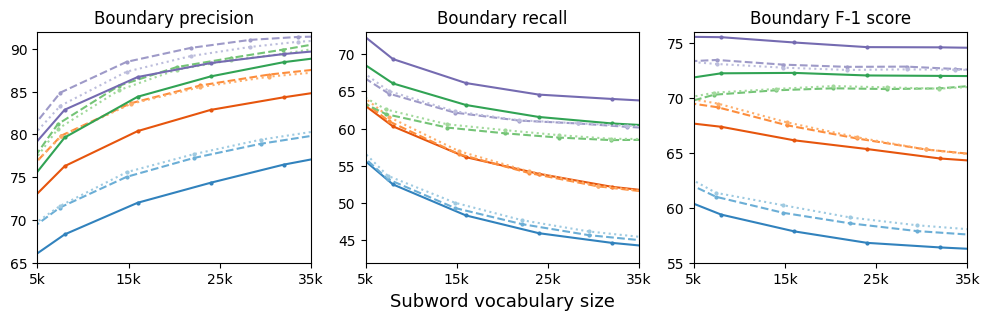

In [167]:
def plot_cs(test_set, suffix="score"):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw = {'wspace': 0.2})
    #plt.axis('on')

    plot_lng("cs", axs[0], test_set, show_y_label=False, suffix="score", vocab_left=True, show_x_label=False, show_lng=False)
    plot_lng("cs", axs[1], test_set, show_y_label=False, suffix="recall", vocab_left=True, show_lng=False)
    plot_lng("cs", axs[2], test_set, show_y_label=False, suffix="fscore", vocab_left=True, show_x_label=False, show_lng=False)
    
    axs[0].set_xlim(5000, 35000)
    axs[1].set_xlim(5000, 35000)
    axs[2].set_xlim(5000, 35000)
    axs[0].set_ylim(65, 92)
    axs[1].set_ylim(42, 73)
    axs[2].set_ylim(55, 76)

    for ax in axs:
        ax.set_xticks([5000, 15000, 25000, 35000], ["5k", "15k", "25k", "35k"])

    axs[0].set_title("Boundary precision")
    axs[1].set_title("Boundary recall")
    axs[2].set_title("Boundary F-1 score")    
    #lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    #lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    #lines, labels = ax.get_legend_handles_labels()
    #fig.legend(lines, labels, loc="lower center", ncols=3, frameon=False, fontsize=8)
    return fig
plot_cs("sigmorphon").savefig("cs_plot.pdf", bbox_inches='tight')

In [36]:
import matplotlib
x = matplotlib.colormaps['tab20c']

In [39]:
x.colors

((0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.921568